# 데이터 분석 실습 과제
Co2의 순배출량 추이를 분석하여 시각화하고, 이후에 대한 예측치를 계산한다.

## 초기화

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 파일 읽기
- 파일 읽어서 해당 정보를 확인한다.
- 인코딩으로 데이터 읽어보고 실패시 CP949로 시도한다.

In [6]:
file_path = '/config/workspace/basic/python_code copy/ESG_CO2_2021.csv' #읽을 파일 위치
try:
    df = pd.read_csv(file_path,encoding='utf-8')
except UnicodeDecodeError: #디코드 에러가 뜨면,
    try:
        df = pd.read_csv(file_path,encoding='cp949') #cp949로 읽는다.
    except UnicodeDecodeError:
        df = pd.read_csv(file_path,encoding='euc-kr') #만약에 또 에러가 뜨면, 다른 인코딩 시도한다.

## 데이터 로드 기본 정보 확인
- pandas, numpy 
- 데이터를 확인한다. df.info(), df.head(), df.describe()

In [11]:
#데이터 구조 확인
print(df.info()) # 데이터 타입 및 결측치를 확인한다.
print(df.shape) #행과 열의 갯수를 확인한다.
print(df.head()) #상위 5개 행을 출력한다.

#데이터 요약 통계 확인 
print(df.describe()) #요약통계량 출력(수치형 컬럼만)
print(df['year'].mean()) #년도별 평균값
print(df['Net'].max()) #net의 최댓값

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    32 non-null     int64  
 1   Net     32 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 640.0 bytes
None
(32, 2)
   year          Net
0  1990  254159.2211
1  1991  281385.5253
2  1992  310216.9541
3  1993  346994.1520
4  1994  369637.1600
              year            Net
count    32.000000      32.000000
mean   2005.500000  511113.240587
std       9.380832  124286.844277
min    1990.000000  254159.221100
25%    1997.750000  428908.157325
50%    2005.500000  507308.536350
75%    2013.250000  638025.741225
max    2021.000000  684683.642100
2005.5
684683.6421


## 데이터 정제 및 전처리 (사이킷 런 활용)
## 데이터 타입 및 확인 변환
- 데이터 정규화 수행!

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Normalized_Net']] = scaler.fit_transform(df[['Net']]) #net값이 크므로, 0-1사이로 정규화시킨다.

## 선형 회귀 그리기
정규화된 데이터를 선형회귀로 그린다.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

y = df['Normalized_Net']
x = df[['year']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

model = LinearRegression()
model.fit(x_train,y_train)

#학습된 기울기와 절편 확인
print("기울기(w1):",model.coef_[0])
print("절편(wo):",model.intercept_)

기울기(w1): 0.030756676974791956
절편(wo): -61.07230250601862


## 모델 평가
- MSE로 모델 평가

In [22]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(x_test) #테스트 데이터로 예측
#평가: 평균제곱오차(MSE)
mse = mean_squared_error(y_test,y_pred)
print("평균 제곱 오차(MSE):",mse)

print("실제 값:",list(y_test))
print("예측 값:",list(y_pred)) 

평균 제곱 오차(MSE): 0.009046507463257197
실제 값: [0.9461352528013733, 0.5830142569310834, 0.9075974733149921, 0.622291836494915, 0.298116147980372, 0.36740134678678305, 0.8417633440124874]
예측 값: [1.025428306086333, 0.5948348284392466, 0.871644921212372, 0.6563481823888324, 0.379538089615707, 0.41029476659049635, 1.0561849830611294]


## 데이터 시각화
- 꺾은선 그래프, 범례추가 
- 그래프 이미지 변환 plt.saveifg(image_file_path)

/config/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/config/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/config/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/config/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/config/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figur

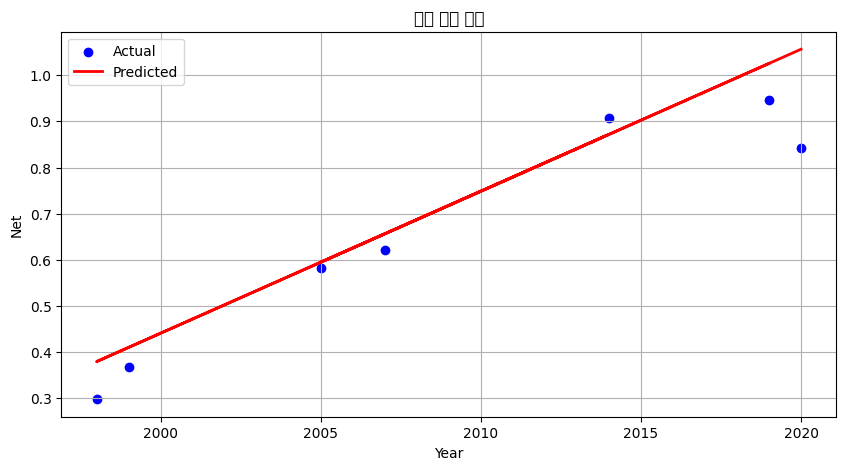

<Figure size 640x480 with 0 Axes>

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(x_test,y_test,color="blue",label="Actual")
plt.plot(x_test,y_pred,color="red",linewidth=2,label="Predicted")
plt.title("선형 회귀 예측")
plt.xlabel("Year")
plt.ylabel("Net")
plt.legend()
plt.grid(True)
plt.show()

## 미래값 예측

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/config/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/config/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/config/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/config/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io

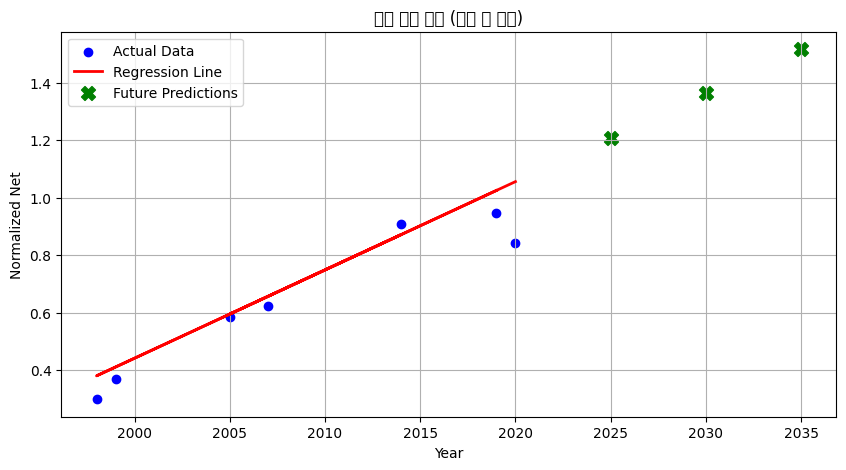

In [30]:
future_years = np.array([2025,2030,2035]).reshape(-1,1)
future_predictions = model.predict(future_years)

plt.figure(figsize=(10,5))
plt.scatter(x_test,y_test,color="blue",label="Actual Data") #실제 데이터 
plt.plot(x_test,model.predict(x_test),color="red",linewidth=2, label="Regression Line") #기존 회귀선

#미래 예측 그래프에 추가
plt.scatter(future_years, future_predictions, color="green", label="Future Predictions", marker='X', s=100)

#그래프 설정
plt.title("선형 회귀 예측 (미래 값 포함)")
plt.xlabel("Year")
plt.ylabel("Normalized Net")
plt.legend() #범례값 설정
plt.grid(True)
plt.show()

In [ ]:
year_range = np.array([x.min()[0]], [x.max()[0]])
pred_range = model.predict(year_range) #예측값

plt.figure()